In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
# Define the file path
file_path = '/content/drive/MyDrive/IntegrationProject/PERM_Disclosure_Data_FY2018_EOY.xlsx'
df = pd.read_excel(file_path)
file_path1 ='/content/drive/MyDrive/IntegrationProject/PERM_FY2019 (1).xlsx'
df1 = pd.read_excel(file_path1)



In [3]:
print(df.columns)
print(df1.columns)

Index(['CASE_NUMBER', 'DECISION_DATE', 'CASE_STATUS', 'CASE_RECEIVED_DATE',
       'REFILE', 'ORIG_FILE_DATE', 'ORIG_CASE_NO', 'SCHD_A_SHEEPHERDER',
       'EMPLOYER_NAME', 'EMPLOYER_ADDRESS_1',
       ...
       'FW_INFO_TRAINING_COMP', 'FW_INFO_REQ_EXPERIENCE',
       'FW_INFO_ALT_EDU_EXPERIENCE', 'FW_INFO_REL_OCCUP_EXP',
       'PREPARER_INFO_EMP_COMPLETED', 'PREPARER_INFO_TITLE',
       'EMPLOYER_DECL_INFO_TITLE', 'NAICS_US_CODE', 'NAICS_US_TITLE',
       'PW_JOB_TITLE_9089'],
      dtype='object', length=125)
Index(['CASE_NUMBER', 'DECISION_DATE', 'CASE_STATUS', 'CASE_RECEIVED_DATE',
       'REFILE', 'ORIG_FILE_DATE', 'ORIG_CASE_NO', 'SCHD_A_SHEEPHERDER',
       'EMPLOYER_NAME', 'EMPLOYER_ADDRESS_1',
       ...
       'FW_INFO_TRAINING_COMP', 'FW_INFO_REQ_EXPERIENCE',
       'FW_INFO_ALT_EDU_EXPERIENCE', 'FW_INFO_REL_OCCUP_EXP',
       'PREPARER_INFO_EMP_COMPLETED', 'PREPARER_INFO_TITLE',
       'EMPLOYER_DECL_INFO_TITLE', 'NAICS_US_CODE', 'NAICS_US_TITLE',
       'PW_JOB_TITLE'],

In [4]:
# checking data types
print(df.dtypes)


CASE_NUMBER                         object
DECISION_DATE               datetime64[ns]
CASE_STATUS                         object
CASE_RECEIVED_DATE          datetime64[ns]
REFILE                              object
                                 ...      
PREPARER_INFO_TITLE                 object
EMPLOYER_DECL_INFO_TITLE            object
NAICS_US_CODE                       object
NAICS_US_TITLE                      object
PW_JOB_TITLE_9089                   object
Length: 125, dtype: object


In [4]:
#comparing the column names between df and df1 to identify any discrepancies.
print("Columns in df but not in df1:", set(df.columns) - set(df1.columns))
print("Columns in df1 but not in df:", set(df1.columns) - set(df.columns))

Columns in df but not in df1: {'WAGE_OFFER_TO_9089', 'WAGE_OFFER_FROM_9089', 'JOB_INFO_TRANING_NUM_MONTHS', 'JOB_INFO_ALT_COMBO_ED', 'PW_JOB_TITLE_9089'}
Columns in df1 but not in df: {'JOB_INFO_ALT_COMBO_ED_EXP.1', 'PW_JOB_TITLE', 'WAGE_OFFERED_FROM_9089', 'JOB_INFO_TRAINING_NUM_MONTHS', 'WAGE_OFFERED_TO_9089'}


In [5]:
#replacing column names
df1.rename(columns={'WAGE_OFFERED_TO_9089': 'WAGE_OFFER_TO_9089'}, inplace=True)
df1.rename(columns={'JOB_INFO_ALT_COMBO_ED_EXP.1': 'JOB_INFO_ALT_COMBO_ED'}, inplace=True)
df1.rename(columns={'WAGE_OFFERED_FROM_9089': 'WAGE_OFFER_FROM_9089'}, inplace=True)
df.rename(columns={'PW_JOB_TITLE_9089': 'PW_JOB_TITLE'}, inplace=True)
df.rename(columns={'JOB_INFO_TRANING_NUM_MONTHS': 'JOB_INFO_TRAINING_NUM_MONTHS'}, inplace=True)


In [6]:
# Combine the datasets vertically (row-wise)
combined_df = pd.concat([df, df1], ignore_index=True)

In [8]:
#check the number of rows
print(f"Rows in df: {len(df)}")
print(f"Rows in df: {len(df1)}")
print(f"Rows in combined dataset: {len(combined_df)}")

Rows in df: 119776
Rows in df: 102655
Rows in combined dataset: 222431


In [9]:
#display the first few rows
combined_df.head(10)

,CASE_NUMBER,DECISION_DATE,CASE_STATUS,CASE_RECEIVED_DATE,REFILE,ORIG_FILE_DATE,ORIG_CASE_NO,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FW_INFO_TRAINING_COMP,FW_INFO_REQ_EXPERIENCE,FW_INFO_ALT_EDU_EXPERIENCE,FW_INFO_REL_OCCUP_EXP,PREPARER_INFO_EMP_COMPLETED,PREPARER_INFO_TITLE,EMPLOYER_DECL_INFO_TITLE,NAICS_US_CODE,NAICS_US_TITLE,PW_JOB_TITLE
0,A-17268-91243,2017-10-01,Withdrawn,2017-09-29,N,NaT,NaN,N,DATA MEANING SERVICES GROUP,3301 NORTH UNIVERSITY DRIVE,...,A,Y,A,A,N,Counsel,Human Capital Manager,541511,Custom Computer Programming Services,Web Architect
1,A-17268-91198,2017-10-01,Withdrawn,2017-09-29,N,NaT,NaN,N,NOVO NORDISK INC.,800 SCUDDERS MILL ROAD,...,A,A,A,Y,N,Partner,"Associate Director, Mobility - Human Resources",325412,Pharmaceutical Preparation Manufacturing,Senior Systems Analyst
2,A-17275-93842,2017-10-02,Withdrawn,2017-10-02,N,NaT,NaN,N,HITACHI CONSULTING CORPORATION,14643 DALLAS PARKWAY,...,A,A,N,Y,N,Of Counsel,"Director, Global Immigration Services",541512,Computer Systems Design Services,Computer Systems Analysts
3,A-17257-86988,2017-10-02,Withdrawn,2017-10-02,N,NaT,NaN,N,HITACHI CONSULTING CORPORATION,14643 DALLAS PARKWAY,...,A,A,N,Y,N,Of Counsel,"Director, Global Immigration Services",541512,Computer Systems Design Services,Computer Systems Analysts
4,A-17263-89145,2017-10-02,Withdrawn,2017-10-02,N,NaT,NaN,N,FANATICS RETAIL GROUP FULFILLMENT INC DBA FANA...,8100 NATIONS WAY,...,A,N,N,Y,N,Attorney,Director of Talent Acquisition,45411,Electronic Shopping and Mail-Order Houses,Statisticians
5,A-17268-91300,2017-10-02,Withdrawn,2017-09-29,N,NaT,NaN,N,"AKAMAI TECHNOLOGIES, INC.",150 BROADWAY,...,A,A,N,A,N,Attorney,Senior Global Mobility Specialist,541512,Computer Systems Design Services,"Computer Occupations, All Other"
6,A-17235-78999,2017-10-02,Withdrawn,2017-09-29,N,NaT,NaN,N,TECHOPS INC,5068 W PLANO PKWY,...,A,A,Y,A,N,Attorney,HR,541511,Custom Computer Programming Services,"Software Developers, Applications"
7,A-17270-91952,2017-10-02,Withdrawn,2017-09-27,N,NaT,NaN,N,"WOLFRAM RESEARCH, INC.",100 TRADE CENTER DRIVE,...,A,A,A,A,N,Senior Immigration Counsel,General Counsel,541710,"Research and Development in the Physical, Engi...","Software Developers, Applications"
8,A-17270-92361,2017-10-02,Withdrawn,2017-09-27,N,NaT,NaN,N,"EPIC GAMES, INC.",620 CROSSROADS BLVD,...,A,Y,A,A,N,Founder,"Director, HR and Recruiting",511210,Software Publishers,Multimedia Artists and Animators
9,A-17228-76714,2017-10-02,Withdrawn,2017-09-17,N,NaT,NaN,N,JD.COM AMERICAN TECHNOLOGIES CORPORATION,675 E MIDDLEFIELD RD,...,A,Y,A,A,N,ATTORNEY AT LAW,Chief H.R. Officer and General Counsel,51919,All Other Information Services,"Software Developers, Systems Software"


In [10]:
print(combined_df.dtypes)


CASE_NUMBER                         object
DECISION_DATE               datetime64[ns]
CASE_STATUS                         object
CASE_RECEIVED_DATE          datetime64[ns]
REFILE                              object
                                 ...      
PREPARER_INFO_TITLE                 object
EMPLOYER_DECL_INFO_TITLE            object
NAICS_US_CODE                       object
NAICS_US_TITLE                      object
PW_JOB_TITLE                        object
Length: 125, dtype: object


In [11]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222431 entries, 0 to 222430
Columns: 125 entries, CASE_NUMBER to PW_JOB_TITLE
dtypes: datetime64[ns](3), float64(7), object(115)
memory usage: 212.1+ MB
None


In [12]:
combined_df.isnull().sum()

,0
CASE_NUMBER,0
DECISION_DATE,0
CASE_STATUS,0
CASE_RECEIVED_DATE,0
REFILE,99404
...,...
PREPARER_INFO_TITLE,17622
EMPLOYER_DECL_INFO_TITLE,483
NAICS_US_CODE,224
NAICS_US_TITLE,360


In [13]:
combined_df.drop('REFILE', axis=1, inplace=True) # since it has more no.of missing values

In [7]:
# Standardize column names
combined_df.columns = combined_df.columns.str.strip().str.lower().str.replace(" ", "_")

# Identify missing values
missing_percent = combined_df.isnull().mean() * 100

# Drop columns with more than 50% missing values
threshold = 50
cols_to_drop = missing_percent[missing_percent > threshold].index
combined_df.drop(columns=cols_to_drop, inplace=True)

# Separate numeric and categorical columns
numeric_cols = combined_df.select_dtypes(include=[np.number]).columns
object_cols = combined_df.select_dtypes(include=["object"]).columns

# Fill missing values intelligently
fill_values = {}

# For numeric columns, fill with median
for col in numeric_cols:
    fill_values[col] = combined_df[col].median()

# For categorical columns, fill with mode (most frequent value)
for col in object_cols:
    if not combined_df[col].mode().empty:
        fill_values[col] = combined_df[col].mode().iloc[0]
    else:
        fill_values[col] = "No Data"  # Just in case mode calculation fails





In [15]:
remaining_missing = combined_df.isnull().sum().sort_values(ascending=False)
print(remaining_missing[remaining_missing > 0])

fw_info_training_comp             100978
recr_info_barg_rep_notified       100284
ri_local_ethnic_paper_to           93666
ri_local_ethnic_paper_from         93660
job_info_experience_num_months     92882
                                   ...  
job_info_work_city                    19
employer_address_1                    16
employer_state                        14
employer_postal_code                   5
employer_city                          2
Length: 83, dtype: int64


In [8]:
# Fill missing values with a default value, e.g., 0
combined_df['employer_num_employees'] = combined_df['employer_num_employees'].fillna(0)

# Now you can convert to int32
combined_df['employer_num_employees'] = combined_df['employer_num_employees'].astype('int32')

In [9]:
#Replace Infinite Values with NaN
#If your dataset contains infinite values (inf or -inf), you’ll need to replace them with NaN before handling them.


import numpy as np

# Replace infinity with NaN
combined_df['employer_num_employees'] = combined_df['employer_num_employees'].replace([np.inf, -np.inf], np.nan)

# Now handle NaN values (e.g., by filling or dropping them)
combined_df['employer_num_employees'] = combined_df['employer_num_employees'].fillna(0)

# Convert to int32
combined_df['employer_num_employees'] = combined_df['employer_num_employees'].astype('int32')

In [10]:
#Convert Non-Finite Values to NaN (Optional)
#If you expect other non-finite values (like 'NA' or 'inf') to exist as string representations, convert them to NaN first.


# Replace string representations of 'NA' and 'inf' with NaN
combined_df['employer_num_employees'] = pd.to_numeric(combined_df['employer_num_employees'], errors='coerce')

# Handle missing values (fill or drop)
combined_df['employer_num_employees'] = combined_df['employer_num_employees'].fillna(0)

# Convert to int32
combined_df['employer_num_employees'] = combined_df['employer_num_employees'].astype('int32')

In [11]:
 #Check for Missing or Infinite Values
#If you want to check which columns have missing or infinite values, you can use the following:

# Check for missing values
print(combined_df.isnull().sum())

# Check for infinite values
print((combined_df == np.inf).sum())
print((combined_df == -np.inf).sum())

case_number                     0
decision_date                   0
case_status                     0
case_received_date              0
refile                      99404
                            ...  
preparer_info_title         17622
employer_decl_info_title      483
naics_us_code                 224
naics_us_title                360
pw_job_title                  478
Length: 89, dtype: int64
case_number                 0
decision_date               0
case_status                 0
case_received_date          0
refile                      0
                           ..
preparer_info_title         0
employer_decl_info_title    0
naics_us_code               0
naics_us_title              0
pw_job_title                0
Length: 89, dtype: int64
case_number                 0
decision_date               0
case_status                 0
case_received_date          0
refile                      0
                           ..
preparer_info_title         0
employer_decl_info_title    0
naics_

In [20]:
# Example: Convert integer columns to smaller integer types
combined_df['employer_num_employees'] = combined_df['employer_num_employees'].astype('int32')

# Convert categorical columns to 'category' type to save memory
combined_df['employer_state'] = combined_df['employer_state'].astype('category')
combined_df['job_info_job_title'] = combined_df['job_info_job_title'].astype('category')
combined_df['case_status'] = combined_df['case_status'].astype('category')
combined_df['pw_soc_title'] = combined_df['pw_soc_title'].astype('category')
combined_df['naics_us_title'] = combined_df['naics_us_title'].astype('category')
combined_df['job_info_work_city'] = combined_df['job_info_work_city'].astype('category')
combined_df['job_info_work_state'] = combined_df['job_info_work_state'].astype('category')

# Perform garbage collection to free up memory
import gc
gc.collect()

0

In [12]:
columns_to_check = [
    'decision_date', 'case_received_date', 'employer_name','employer_state', 'employer_num_employees', 'employer_yr_estab', 'job_info_job_title', 'pw_soc_code', 'pw_soc_title', 'naics_us_code', 'naics_us_title'

   ,  'pw_unit_of_pay_9089', 'wage_offer_from_9089', 'wage_offer_unit_of_pay_9089', 'case_status', 'job_info_work_city', 'job_info_work_state', 'pw_job_title'

]

# Checking missing values
missing_values = combined_df[columns_to_check].isnull().sum()

# Displaying missing values in percentage
missing_percentage = (missing_values / len(combined_df)) * 100

# Combine both counts and percentages in one DataFrame for better insights
missing_summary = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage.round(2)
})

# Display sorted by highest percentage
print(missing_summary.sort_values(by='Missing_Percentage', ascending=False))

                             Missing_Count  Missing_Percentage
pw_soc_code                            603                0.27
pw_soc_title                           603                0.27
employer_yr_estab                      544                0.24
pw_unit_of_pay_9089                    503                0.23
pw_job_title                           478                0.21
naics_us_title                         360                0.16
naics_us_code                          224                0.10
job_info_job_title                      66                0.03
wage_offer_from_9089                    36                0.02
wage_offer_unit_of_pay_9089             32                0.01
job_info_work_state                     24                0.01
job_info_work_city                      19                0.01
employer_state                          14                0.01
decision_date                            0                0.00
case_received_date                       0             

In [13]:
# Fill categorical columns with mode (most frequent value)
cat_cols = ['pw_soc_code', 'pw_soc_title', 'employer_state',
             'naics_us_code', 'naics_us_title', 'job_info_job_title']
for col in cat_cols:
    combined_df[col].fillna(combined_df[col].mode()[0], inplace=True)

<ipython-input-13-d992f2bf0bd5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df[col].fillna(combined_df[col].mode()[0], inplace=True)


In [14]:
# Clean wage columns by removing commas, dollar signs, etc.
cols_to_clean = ['wage_offer_from_9089', 'employer_num_employees',]

for col in cols_to_clean:
    combined_df[col] = pd.to_numeric(combined_df[col].astype(str)
                                    .str.replace(',', '', regex=True)   # Remove commas
                                    .str.replace(r'[^0-9.]', '', regex=True)  # Remove non-numeric characters
                                    , errors='coerce')  # Coerce invalid entries to NaN

In [15]:
# Fill numerical columns with median
num_cols = ['wage_offer_from_9089', 'employer_num_employees']
for col in num_cols:
    combined_df[col].fillna(combined_df[col].median(), inplace=True)

<ipython-input-15-e4f165560728>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df[col].fillna(combined_df[col].median(), inplace=True)


In [16]:
# Fill 'pw_unit_of_pay_9089' using 'wage_offer_unit_of_pay_9089' where available
combined_df['pw_unit_of_pay_9089'].fillna(combined_df['wage_offer_unit_of_pay_9089'], inplace=True)

# For remaining missing values, fill with the most common unit (likely 'Yearly')
combined_df['pw_unit_of_pay_9089'].fillna('Yearly', inplace=True)
combined_df['wage_offer_unit_of_pay_9089'].fillna('Yearly', inplace=True)

<ipython-input-16-b3610c2ef2bb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['pw_unit_of_pay_9089'].fillna(combined_df['wage_offer_unit_of_pay_9089'], inplace=True)
<ipython-input-16-b3610c2ef2bb>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [17]:
#For time-sensitive columns like case_received_date or decision_date, you can apply forward or backward filling to maintain continuity.


combined_df['case_received_date'].fillna(method='ffill', inplace=True)
combined_df['decision_date'].fillna(method='bfill', inplace=True)

<ipython-input-17-282e94690bab>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['case_received_date'].fillna(method='ffill', inplace=True)
<ipython-input-17-282e94690bab>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df['case_received_date'].fillna(method='ffill', inplace=True)
<ipython-input-17-282e94690bab>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment

In [18]:
columns_to_check = [
    'decision_date', 'case_received_date', 'employer_name','employer_state', 'employer_num_employees', 'employer_yr_estab', 'job_info_job_title', 'pw_soc_code', 'pw_soc_title', 'naics_us_code', 'naics_us_title'

   ,  'pw_unit_of_pay_9089', 'wage_offer_from_9089', 'wage_offer_unit_of_pay_9089', 'case_status', 'job_info_work_city', 'job_info_work_state', 'pw_job_title'

]

# Checking missing values
missing_values = combined_df[columns_to_check].isnull().sum()

# Displaying missing values in percentage
missing_percentage = (missing_values / len(combined_df)) * 100

# Combine both counts and percentages in one DataFrame for better insights
missing_summary = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage.round(2)
})

# Display sorted by highest percentage
print(missing_summary.sort_values(by='Missing_Percentage', ascending=False))

                             Missing_Count  Missing_Percentage
employer_yr_estab                      544                0.24
pw_job_title                           478                0.21
job_info_work_city                      19                0.01
job_info_work_state                     24                0.01
case_received_date                       0                0.00
decision_date                            0                0.00
job_info_job_title                       0                0.00
employer_name                            0                0.00
employer_state                           0                0.00
employer_num_employees                   0                0.00
naics_us_code                            0                0.00
pw_soc_title                             0                0.00
pw_soc_code                              0                0.00
naics_us_title                           0                0.00
wage_offer_unit_of_pay_9089              0             

In [19]:
#Checking unique values
columns_to_check = [
    'employer_yr_estab', 'pw_job_title', 'job_info_work_city', 'job_info_work_state',
    'case_received_date', 'decision_date', 'job_info_job_title', 'employer_name',
    'employer_state', 'employer_num_employees', 'naics_us_code', 'pw_soc_title',
    'pw_soc_code', 'naics_us_title', 'wage_offer_unit_of_pay_9089',
    'wage_offer_from_9089', 'pw_unit_of_pay_9089', 'case_status'
]

for col in columns_to_check:
    unique_vals = combined_df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

employer_yr_estab: 264 unique values
pw_job_title: 11841 unique values
job_info_work_city: 7537 unique values
job_info_work_state: 111 unique values
case_received_date: 2005 unique values
decision_date: 635 unique values
job_info_job_title: 55572 unique values
employer_name: 49256 unique values
employer_state: 112 unique values
employer_num_employees: 4476 unique values
naics_us_code: 1960 unique values
pw_soc_title: 732 unique values
pw_soc_code: 802 unique values
naics_us_title: 1529 unique values
wage_offer_unit_of_pay_9089: 6 unique values
wage_offer_from_9089: 27402 unique values
pw_unit_of_pay_9089: 6 unique values
case_status: 4 unique values


In [20]:
#employer_yr_estab (264 unique values)
#Goal: Convert to numeric and bin into decades


combined_df['employer_yr_estab'] = pd.to_numeric(combined_df['employer_yr_estab'], errors='coerce')
combined_df['estab_decade'] = (combined_df['employer_yr_estab'] // 10) * 10

#Check Unique Values in Cleaned Year Column
#If you just cleaned and converted employer_yr_estab to numeric:

combined_df['employer_yr_estab'].nunique()

264

In [31]:
#job_info_work_city (7,522 values)
#Goal: Standardize capitalization and remove trailing whitespace


combined_df['job_info_work_city'] = combined_df['job_info_work_city'].str.title().str.strip()
combined_df['job_info_work_city'].nunique()

5505

In [32]:
#job_info_work_state & employer_state (111–112 values)
#Goal: Normalize to uppercase 2-letter codes


combined_df['job_info_work_state'] = combined_df['job_info_work_state'].str.upper().str.strip()
combined_df['employer_state'] = combined_df['employer_state'].str.upper().str.strip()
combined_df['job_info_work_state'].nunique()
combined_df['employer_state'].nunique()

112

In [22]:
#case_received_date, decision_date
#Goal: Convert to datetime

combined_df['case_received_date'] = pd.to_datetime(combined_df['case_received_date'], errors='coerce')
combined_df['decision_date'] = pd.to_datetime(combined_df['decision_date'], errors='coerce')

In [23]:
#employer_name (49,184 values)
#Goal: Clean casing and remove suffixes like “Inc.”, “LLC”


combined_df['employer_name_clean'] = (
    combined_df['employer_name']
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
    .str.replace(r'\b(inc|llc|ltd|corp|co|corporation|incorporated)\b', '', regex=True)
    .str.strip()
)
combined_df['employer_name_clean'].nunique()

47712

In [ ]:
# employer_num_employees (4,475 values)
#Goal: Convert to numeric and bin into employee size ranges


combined_df['employer_num_employees'] = pd.to_numeric(combined_df['employer_num_employees'], errors='coerce')

def bin_employees(num):
    if pd.isnull(num):
        return 'Unknown'
    elif num < 50:
        return '<50'
    elif num < 500:
        return '50–499'
    elif num < 5000:
        return '500–4999'
    else:
        return '5000+'
combined_df['employee_bin']= combined_df['employer_num_employees'].apply(bin_employees)
combined_df['employee_bin'].value_counts()

,count
employee_bin,
5000+,88192
<50,46993
500–4999,44886
50–499,42360


In [24]:
#Extract First 2 Digits   naics_us_code (1,960 values)

combined_df['naics_sector'] = combined_df['naics_us_code'].astype(str).str[:2]

#Check Which Sectors Exist in  Data
unique_sectors = combined_df['naics_sector'].value_counts().sort_index()
print(unique_sectors)

naics_sector
11     1588
21      494
22      537
23     3754
31     5947
32     3223
33    25019
42     5046
44     3680
45    11155
48     3748
49      382
51    19084
52    14255
53     1254
54    89601
55     1078
56     5293
61     9159
62     8196
71      996
72     5794
81     2873
92      275
Name: count, dtype: int64


In [25]:
#Create a NAICS Sector Map Based on Your Data

naics_sector_map = {
    '11': 'Agriculture, Forestry, Fishing & Hunting',
    '21': 'Mining, Quarrying, and Oil & Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '45': 'Retail Trade',
    '48': 'Transportation & Warehousing',
    '49': 'Transportation & Warehousing',
    '51': 'Information',
    '52': 'Finance & Insurance',
    '53': 'Real Estate & Rental & Leasing',
    '54': 'Professional, Scientific & Technical Services',
    '55': 'Management of Companies & Enterprises',
    '56': 'Administrative & Support Services',
    '61': 'Educational Services',
    '62': 'Healthcare & Social Assistance',
    '71': 'Arts, Entertainment & Recreation',
    '72': 'Accommodation & Food Services',
    '81': 'Other Services',
    '92': 'Public Administration'
}
#Apply the Mapping to the DataFrame

combined_df['naics_sector_label'] = combined_df['naics_sector'].map(naics_sector_map)
#Check for Unmapped Codes
#To confirm all codes were successfully mapped
combined_df['naics_sector_label'].isnull().sum()

np.int64(0)

In [37]:
#pw_soc_code, pw_soc_title (job classification)
#Goal: Use SOC code or title for role-based grouping (already clean)


combined_df['pw_soc_code'] = combined_df['pw_soc_code'].astype(str).str.zfill(6)

In [38]:
#Here’s the code to clean naics_us_title by converting to lowercase and removing extra spaces:

combined_df['naics_us_title_clean'] = combined_df['naics_us_title'].str.lower().str.strip()
#Remove Punctuation or Special Characters
#If your titles include things like -, ,, . etc., you can remove them for better matching:
import re

combined_df['naics_us_title_clean'] = combined_df['naics_us_title_clean'].str.replace(r'[^a-z\s]', '', regex=True)

In [39]:
#wage_offer_unit_of_pay_9089, pw_unit_of_pay_9089
#Goal: Normalize units (e.g., "Hour", "hour", "Hourly" → "hour")


combined_df['wage_offer_unit_of_pay_9089'] = combined_df['wage_offer_unit_of_pay_9089'].str.lower().str.strip()
combined_df['pw_unit_of_pay_9089'] = combined_df['pw_unit_of_pay_9089'].str.lower().str.strip()

In [26]:
#wage_offer_from_9089 (27,342 values)
#Goal: Convert to annual salary (create wage_annualized)


def annualize_wage(row):
    wage = row['wage_offer_from_9089']
    unit = str(row['wage_offer_unit_of_pay_9089']).lower()
    if pd.isnull(wage) or pd.isnull(unit):
        return None
    if unit == 'hour':
        return wage * 40 * 52
    elif unit == 'week':
        return wage * 52
    elif unit == 'month':
        return wage * 12
    elif unit == 'year':
        return wage
    else:
        return None

combined_df['wage_annualized'] = combined_df.apply(annualize_wage, axis=1)

In [27]:
# Convert 'DECISION_DATE' to datetime format
combined_df['decision_date'] = pd.to_datetime(combined_df['decision_date'], errors='coerce')

# Extract the year from 'DECISION_DATE'
combined_df['YEAR'] = combined_df['decision_date'].dt.year

# Display sample data to verify
print(combined_df[['decision_date', 'YEAR']].head())

  decision_date  YEAR
0    2017-10-01  2017
1    2017-10-01  2017
2    2017-10-02  2017
3    2017-10-02  2017
4    2017-10-02  2017


In [ ]:
# EDA
#a. H1B sponsership trends overtime
top_employers = combined_df['employer_name_clean'].value_counts().head(10).index
df_top_employers = combined_df[combined_df['employer_name_clean'].isin(top_employers)]
print("Top 10 H1B Sponsoring Employers:")
print(top_employers)


Top 10 H1B Sponsoring Employers:
Index(['google', 'amazoncom services', 'intel', 'microsoft',
       'tata consultancy services limited',
       'cognizant technology solutions us', 'facebook', 'amazon corporate',
       'apple', 'infosys'],
      dtype='object', name='employer_name_clean')


In [ ]:
# Display top employers with their  application counts
top_employers_counts = combined_df['employer_name_clean'].value_counts().head(10)
print("Top 10 H1B Sponsoring Employers with Application Counts:")
print(top_employers_counts)

Top 10 H1B Sponsoring Employers with Application Counts:
employer_name_clean
google                               4690
amazoncom services                   3881
intel                                3624
microsoft                            3580
tata consultancy services limited    3023
cognizant technology solutions us    2984
facebook                             2924
amazon corporate                     2158
apple                                2028
infosys                              1914
Name: count, dtype: int64


In [ ]:
# Extract year for grouping
df_top_employers.loc[:,'YEAR'] = df_top_employers['decision_date'].dt.year

# Count applications per year
annual_counts = df_top_employers.groupby(['YEAR', 'employer_name_clean']).size().reset_index(name='COUNT')
print("annual application are:")
print(annual_counts)

annual application are:
    YEAR                employer_name_clean  COUNT
0   2017                   amazon corporate    571
1   2017                              apple    155
2   2017  cognizant technology solutions us      5
3   2017                           facebook    149
4   2017                             google    242
5   2017                            infosys      8
6   2017                              intel    486
7   2017                          microsoft    307
8   2017  tata consultancy services limited      1
9   2018                   amazon corporate   1586
10  2018                 amazoncom services   1675
11  2018                              apple   1037
12  2018  cognizant technology solutions us    399
13  2018                           facebook   1532
14  2018                             google   2257
15  2018                            infosys   1057
16  2018                              intel   1618
17  2018                          microsoft   2228
18  201

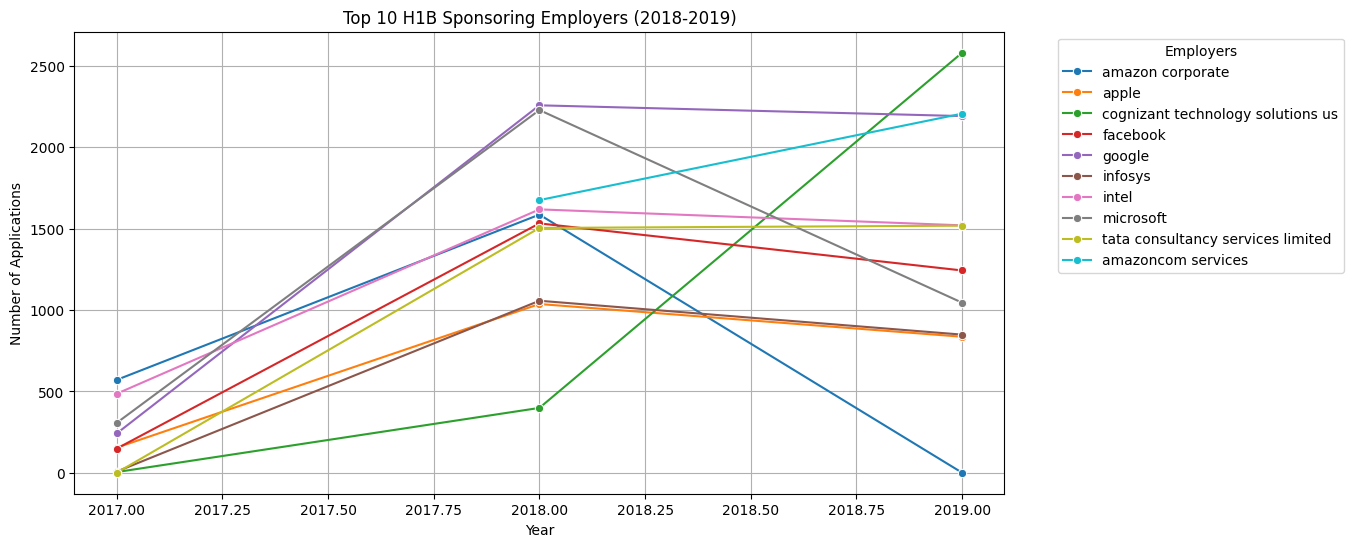

In [ ]:
# TOP EMPLOYERS WITH ANNUAL APPLICATIONS (LINE GRAPH)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_counts, x='YEAR', y='COUNT', hue='employer_name_clean', marker='o')

plt.title('Top 10 H1B Sponsoring Employers (2018-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.legend(title='Employers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<Figure size 2000x600 with 0 Axes>

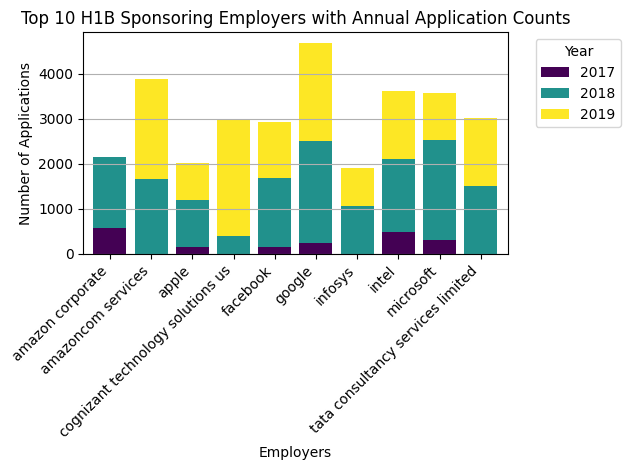

In [ ]:
#Top employers with annual application count(BAR GRAPH)
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot data for bar plot
pivot_df = annual_counts.pivot(index='employer_name_clean', columns='YEAR', values='COUNT').fillna(0)

# Plotting the bar graph
plt.figure(figsize=(20, 6))
pivot_df.plot(kind='bar', stacked=True, colormap='viridis', width=0.8)

plt.title('Top 10 H1B Sponsoring Employers with Annual Application Counts')
plt.xlabel('Employers')
plt.ylabel('Number of Applications')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

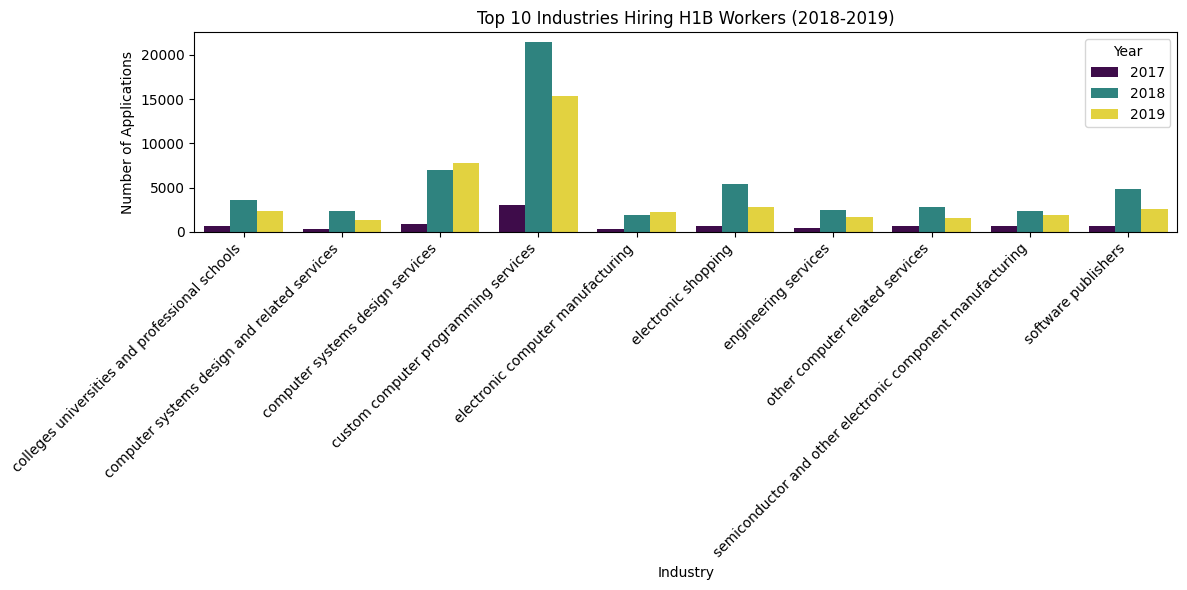

In [ ]:
# INDUSTRY AND TECHNOLOGY ANALYSIS

# Aggregate industry counts
industry_counts = combined_df.groupby(['YEAR', 'naics_us_title_clean']).size().reset_index(name='COUNT')

# Identify top 10 industries
top_industries = industry_counts.groupby('naics_us_title_clean')['COUNT'].sum().nlargest(10).index
industry_counts_top = industry_counts[industry_counts['naics_us_title_clean'].isin(top_industries)]

# Plotting industry trends
plt.figure(figsize=(12, 6))
sns.barplot(data=industry_counts_top, x='naics_us_title_clean', y='COUNT', hue='YEAR', palette='viridis')

plt.title('Top 10 Industries Hiring H1B Workers (2018-2019)')
plt.xlabel('Industry')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: drop rows where annualized wage is missing
combined_df = combined_df[combined_df['wage_annualized'].notna()]

# Compute average salary by industry (naics_us_title)
avg_salary_industry = combined_df.groupby('naics_us_title_clean')['wage_annualized'].mean().reset_index()
avg_salary_industry = avg_salary_industry.sort_values(by='wage_annualized', ascending=False)

# Compute average salary by job title
avg_salary_title = combined_df.groupby('job_info_job_title_grouped')['wage_annualized'].mean().reset_index()
avg_salary_title = avg_salary_title.sort_values(by='wage_annualized', ascending=False)

# Display summary statistics
print("Summary Statistics for Industries:\n", avg_salary_industry.describe())
print("\nSummary Statistics for Job Titles:\n", avg_salary_title.describe())

print(avg_salary_title)
print(avg_salary_industry)

Summary Statistics for Industries:
        wage_annualized
count      1476.000000
mean      80944.300964
std       29499.564545
min       17118.000000
25%       59293.107143
50%       81201.950000
75%      100350.065526
max      250000.000000

Summary Statistics for Job Titles:
        wage_annualized
count     38494.000000
mean     104360.873516
std       48389.149903
min       15080.000000
25%       73620.600000
50%      101530.870000
75%      127000.000000
max      500000.000000
                              job_info_job_title_grouped  wage_annualized
31360                          soccer commentatoranalyst         500000.0
29325  senior open source software engineer  big data...         500000.0
27205                 senior attorneys multiple openings         500000.0
23127                    product manager  studio finance         500000.0
18419        manager of discovery science and algorithms         500000.0
...                                                  ...             

In [ ]:
#output explanation
# Industries (naics_us_title_clean)
 #Key Statistics:

#Metric	Value
#Count	1,476 industries (was 1,529)
#Mean Salary	~$80,944
#Std Dev	~$29,500
#Min	$17,118
#Max	$250,000

#Interpretation:
#You've successfully filtered out industries with missing or invalid wages (NaN).

#Salary distribution is tightly packed — most industries fall between ~$59K and $100K.

#Top industry salaries (e.g., Coal Mining, Missile Manufacturing, Physician Offices) are consistent with high-skilled H1B sponsorships.

#Lowest-paying sectors still include waste collection, septic services, and barber shops.

#Job Titles (job_info_job_title_grouped)
#Key Statistics:

#Metric	Value
#Count	38,494 job title groups (was 55,514 before grouping/cleaning)
#Mean Salary	~$104,361
#Std Dev	~$48,389
#Min	$15,080
#Max	$500,000
# Interpretation:
#You reduced job title variability by grouping (~17K titles reduced), which is excellent for analysis.

#The average salary remains consistent (~$104K).

#Top titles still cap at $500K — mostly high-ranking managerial or senior technical roles:

#"Senior Attorneys"

#"Product Manager – Studio Finance"

#"Manager of Discovery Science and Algorithms"

#Lowest-paying roles include:

#"custodial worker"

#"residential habilitation aid"

#"teacher teachers aid"

#These align with real-world labor trends in the H1B program.


<ipython-input-71-c5d3597514a8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df,


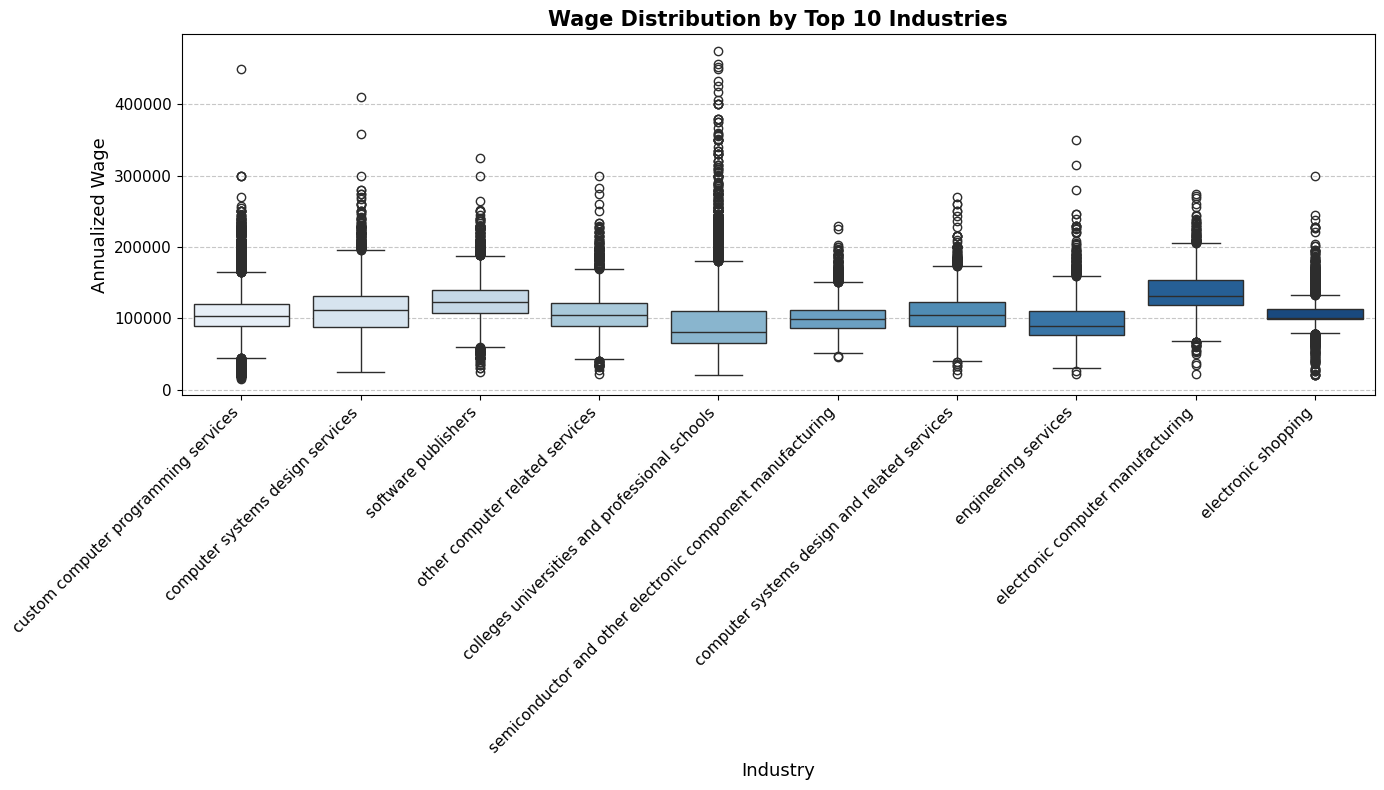

In [ ]:
#Box Plot – Show Wage Distribution Across Industries or Titles

#Identify spread, median, and outliers in salaries across industries or job titles.


import seaborn as sns
import matplotlib.pyplot as plt

# Filter top 10 industries by frequency
top_industries = combined_df['naics_us_title_clean'].value_counts().head(10).index
filtered_df = combined_df[combined_df['naics_us_title_clean'].isin(top_industries)]

plt.figure(figsize=(14, 8))  # Bigger size
sns.boxplot(data=filtered_df,
            x='naics_us_title_clean',
            y='wage_annualized',
            palette='Blues')

# Make axis readable
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Industry", fontsize=13)
plt.ylabel("Annualized Wage", fontsize=13)
plt.title("Wage Distribution by Top 10 Industries", fontsize=15, weight='bold')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
#Key Insights:
#Most industries have median wages between ~$90K and $130K.

#Education-related industries like "colleges universities and professional schools" tend to offer lower wages.

#High-tech industries such as "software publishers" and "semiconductor manufacturing" show strong wage potential with significant outliers.

#The presence of many outliers in several industries shows the diversity of roles and experience levels being sponsored.

In [ ]:

#Which states offer higher H1B wages in specific industries

#Regional hotspots (e.g., California, New York, Texas)

#Disparities in wage levels within the same industry across locations

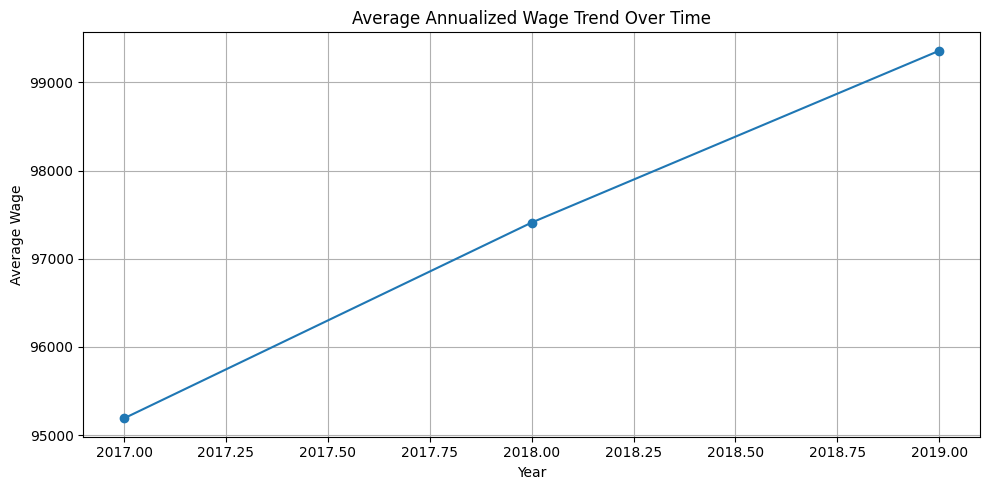

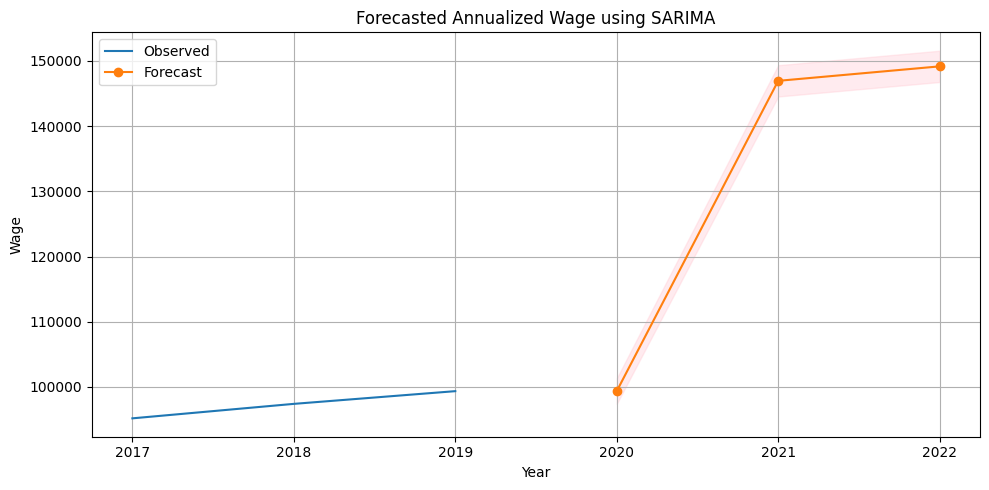

,YEAR,wage_annualized
0,2017,95189.978811
1,2018,97410.356977
2,2019,99359.627351


In [ ]:
#
 📈 Wage Trend Time-Series Analysis: Annualized Wages Over Time using ARIMA/SARIMA

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Step 1: Ensure YEAR column exists (extracted from case_received_date)
combined_df['decision_date'] = pd.to_datetime(combined_df['decision_date'], errors='coerce')
combined_df['YEAR'] = combined_df['decision_date'].dt.year

# Step 2: Filter reasonable wage values to remove outliers
filtered_df = combined_df[(combined_df['wage_annualized'] > 15000) & (combined_df['wage_annualized'] < 300000)]

# Step 3: Group by year and calculate average wage
wage_trend = filtered_df.groupby('YEAR')['wage_annualized'].mean().reset_index()

# Step 4: Plot the trend
plt.figure(figsize=(10, 5))
plt.plot(wage_trend['YEAR'], wage_trend['wage_annualized'], marker='o')
plt.title('Average Annualized Wage Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Wage')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Prepare for ARIMA/SARIMA Modeling
wage_trend.set_index('YEAR', inplace=True)

# Create SARIMA model (simple example order)
model = SARIMAX(wage_trend['wage_annualized'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
model_fit = model.fit(disp=False)

# Forecast next 3 years
forecast = model_fit.get_forecast(steps=3)
forecast_index = range(wage_trend.index.max() + 1, wage_trend.index.max() + 4)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 6: Plot Forecast
plt.figure(figsize=(10, 5))
plt.plot(wage_trend.index, wage_trend['wage_annualized'], label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', marker='o')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecasted Annualized Wage using SARIMA')
plt.xlabel('Year')
plt.ylabel('Wage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Output available wage trend table
wage_trend.reset_index().head()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:10:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     12314
           1       0.21      0.70      0.33       954

    accuracy                           0.79     13268
   macro avg       0.59      0.75      0.60     13268
weighted avg       0.92      0.79      0.84     13268

Confusion Matrix:
[[9867 2447]
 [ 288  666]]


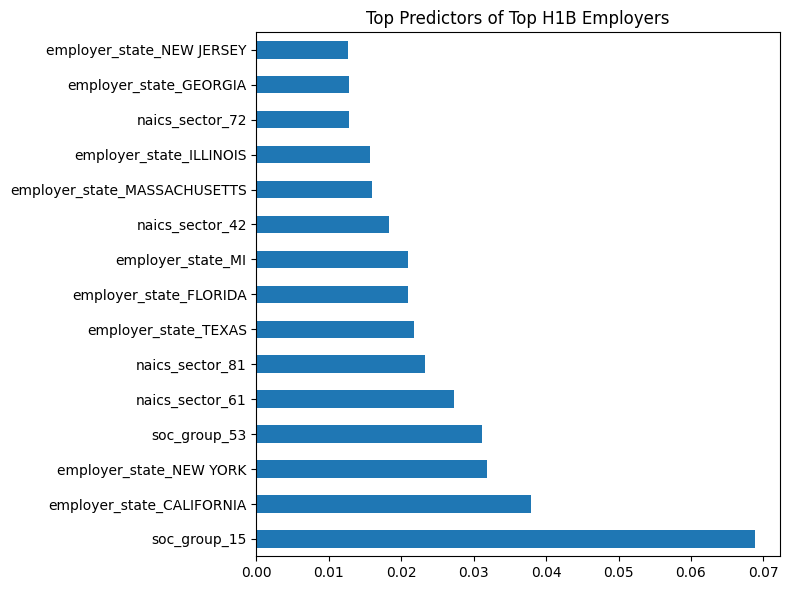

In [28]:
#Building an XGBoost classification model to predict whether an employer is among the top H1B sponsors.
import pandas as pd

# Clean employer name
combined_df['employer_name_clean'] = combined_df['employer_name'].str.lower().str.strip()

# Create NAICS sector (first 2 digits)
combined_df['naics_sector'] = combined_df['naics_us_code'].astype(str).str[:2]

# Create SOC group (first 2 digits)
combined_df['soc_group'] = combined_df['pw_soc_code'].astype(str).str[:2]

# Create company age (assuming decision year is around 2024)
combined_df['company_age'] = 2024 - combined_df['employer_yr_estab']

# Create wage_annualized from wage_offer_from_9089 and its unit
def annualize_wage(row):
    wage = row['wage_offer_from_9089']
    unit = str(row['wage_offer_unit_of_pay_9089']).lower()
    if pd.isnull(wage) or pd.isnull(unit):
        return None
    if unit == 'hour':
        return wage * 40 * 52
    elif unit == 'week':
        return wage * 52
    elif unit == 'month':
        return wage * 12
    elif unit == 'year':
        return wage
    else:
        return None

combined_df['wage_annualized'] = combined_df.apply(annualize_wage, axis=1)

#  Filter for approved applications only
approved_df = combined_df[combined_df['case_status'].isin(['Certified', 'Certified-Expired'])]

# Count approved applications per employer
employer_counts = approved_df.groupby('employer_name_clean').size().reset_index(name='application_count')

# Merge with selected features (drop duplicates per employer)
features = ['employer_name_clean', 'employer_state',

            'naics_sector', 'soc_group', 'employer_num_employees','YEAR',



            'company_age', 'wage_annualized']

employer_features = combined_df[features].drop_duplicates(subset='employer_name_clean')

model_df = employer_counts.merge(employer_features, on='employer_name_clean', how='left')

# Label top 10% employers
threshold = model_df['application_count'].quantile(0.93)
model_df['is_top_employer'] = (model_df['application_count'] >= threshold).astype(int)

# Preprocess for Modeling
from sklearn.model_selection import train_test_split

# Drop rows with missing key values
model_df = model_df.dropna(subset=['employer_state',
                                   'naics_sector', 'soc_group',
                                   'employer_name_clean','employer_num_employees','YEAR',

                                   'company_age', 'wage_annualized'])

# One-hot encode categorical columns
model_encoded = pd.get_dummies(model_df.drop(columns=['application_count', 'employer_name_clean']),
                                columns=['employer_state',
                                         'naics_sector', 'soc_group'],
                                drop_first=True)

X = model_encoded.drop(columns='is_top_employer')
y = model_encoded['is_top_employer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Handle class imbalance with scale_pos_weight
scale_weight = (len(y_train) - sum(y_train)) / sum(y_train)

xgb = XGBClassifier(scale_pos_weight=scale_weight,
                    random_state=42,
                    use_label_encoder=False,
                    eval_metric='logloss')

xgb.fit(X_train, y_train)

# Predict
y_proba = xgb.predict_proba(X_test)[:, 1]

# Custom threshold: 0.6
y_pred_custom = (y_proba > 0.6).astype(int)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_custom))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

import matplotlib.pyplot as plt
import pandas as pd

importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(15).plot(kind='barh', title='Top Predictors of Top H1B Employers', figsize=(8, 6))
plt.tight_layout()
plt.show()